In [ ]:
from binance import Client


In [ ]:
import pandas as pd


In [ ]:
api_key="API_KEY"
api_secret="SECRET_KEY"

In [ ]:
client = Client(api_key,api_secret)

In [ ]:
client.get_account()

In [ ]:
pd.DataFrame(client.get_historical_klines('BTCUSDT','1m','30 m ago UTC'))

In [ ]:
def getminutedata(symbol,interval,lookback):
  frame = pd.DataFrame(client.get_historical_klines(symbol,interval,lookback+' m ago UTC'))
  frame= frame.iloc[:,:6]
  frame.columns=['Time','Open','High','Low','Close','Volume']  
  frame = frame.set_index('Time')
  frame.index = pd.to_datetime(frame.index,unit='ms')
  frame= frame.astype(float)
  return frame



In [ ]:
test = getminutedata('BTCUSDT','1m','30')

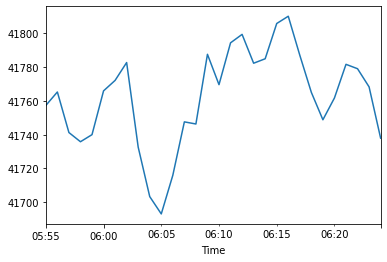

In [ ]:
test.Open.plot()

In [ ]:
#buy if asset fell by more than 0.2% (random number for now) within last 30 min
# sell if asset rises by more than 0.15%(min to make profit) or falls furether by 0.15%

In [ ]:
def strategytest(symbol, qty, entried=False):
  df = getminutedata(symbol,'1m','30')
  cumulret = (df.Open.pct_change() +1).cumprod()-1
  if not entried:
    if cumulret[-1] < 0.002:
      order=client.create_order(symbol=symbol, side='BUY', type='MARKET',quantity=qty)
      print(order)
      entried=True
    else:
      print('No Trade has been executed')
  if entried:
    while True:
      df = getminutedata(symbol,'1m','30')
      sincebuy = df.loc[df.index > pd.to_datetime(order['transactTime'],unit='ms')]
      if len(sincebuy) > 0:
        sincebuyret = (sincebuy.Open.pct_change() +1).cumprod()-1
        if sincebuyret[-1] > 0.0015 or sincebuyret[-1] <-0.0015 :
          order= client.create_order(symbol=symbol, side='SELL', type='MARKET',quantity=qty)
          print(order)
          break

In [ ]:
strategytest('BTCBUSD',0.0004)

No Trade has been executed
